# Polymer stats iPython notebook

Supplementary material for the IB Materials lectures on rubber elasticity and entropic forces.

A Kabla, 2016 - 2020

_______

This notebook generates random diffusion configurations in 2D and build the statistics of the end-to-end distances that is required for the calculation of the configurational entropy.

In [73]:
# Load relevant modules

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import numpy as np
%config InlineBackend.figure_format = 'svg'

from matplotlib import rcParams
rcParams["font.size"] = "12"
rcParams['figure.figsize'] = 8, 8



In [74]:
def get_particle_path(nm, am):
    thetas = 2 * np.pi * np.random.rand(nm)
    dx = am * np.cos(thetas)
    dy = am * np.sin(thetas)
    x = np.add.accumulate(dx)
    y = np.add.accumulate(dy)
    return((x,y))


(-3.693529349522555, 8.526416643453123, -3.2516611351097393, 8.076626986778203)

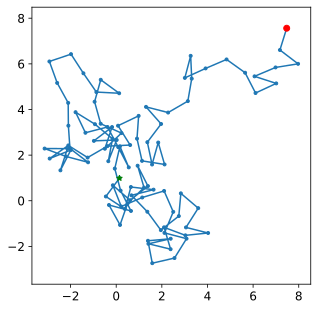

In [75]:
step_length = 1 # per time step
time_step = 1. # delta t
t = 100.0
n_steps = int(t / time_step)

(x,y)=get_particle_path(n_steps, step_length)

rcParams['figure.figsize'] = 5, 5

plt.plot(x,y,'.-')
plt.plot([x[0]],[y[0]],'g*')
plt.plot([x[-1]],[y[-1]],'ro')
plt.axis('equal')

# uncomment this to save the figure
#plt.savefig("polymer_shape.svg")


In [76]:
def ensemble_stat(n, nm, am):
    xa=np.zeros(n)
    ya=np.zeros(n)
    ra=np.zeros(n)
    for i in range(n):
        (x,y)=get_particle_path(nm, am)
        (xa[i],ya[i])=(x[-1],y[-1])
        ra[i]=np.sqrt(xa[i]**2+ya[i]**2)
    return(xa,ya,ra)


We can now study the statistics of end-to-end positions. The next cell only calls the function above and present the data.

In [77]:
# number of polymer configurations
n = 50000

(xa,ya,ra) = ensemble_stat(n, n_steps, step_length)

rcParams["font.size"] = "10.5"
rcParams['figure.figsize'] = 8, 8

plt.subplot(2,2,1)
plt.plot(xa,ya,'.')
plt.axis('equal')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("End positions $(x,y)$")

plt.subplot(2,2,2)
plt.hist(xa, int(np.sqrt(n)))
plt.xlabel("$x$")
plt.title("Histogram of $x$")

plt.subplot(2,2,4)
plt.hist(ya, int(np.sqrt(n)))
plt.xlabel("$y$")
plt.title("Histogram of $y$")

plt.subplot(2,2,3)
plt.hist(ra, int(np.sqrt(n)))
plt.xlabel("$r = \sqrt{x^2+y^2}$")
plt.title("Histogram of end-to-end distance $r$")

plt.tight_layout()


#plt.savefig("polymer_stats.pdf")



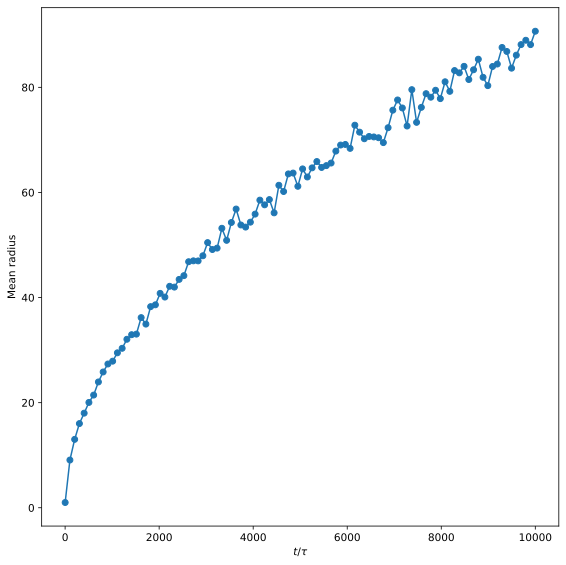

In [78]:
# number of polymer configurations
n = 500

r_values = np.zeros(100)
steps = np.linspace(1,1e4,100).astype(int)

for i, ns in enumerate(steps):
    (_,_,ra) = ensemble_stat(n, ns, step_length)
    r_values[i] = np.mean(ra)


rcParams["font.size"] = "10.5"
rcParams['figure.figsize'] = 8, 8

plt.plot(steps, r_values, 'o-')
plt.ylabel("Mean radius")
plt.xlabel(r"$t/\tau$")
plt.tight_layout()



In [80]:
[a,b] = np.polyfit(time_step * steps, r_values**2, 1)
print("slope = ", a)
print("intercept = ", b)
print("D = ", a/4.0)

# at step length = 0.5, D = 0.04853883717779678
# at step length = 1, D = 0.1973178202861725
# at step length = 2, D = 0.7833890224728421

# => diffusion constant proportional to step length squared

slope =  0.78927128114469
intercept =  -0.37383483064710155
D =  0.1973178202861725
